# **Import Libraries**

In [ ]:
# Import necessary libraries
import os 
import tensorflow as tf  # For building and training machine learning models
from transformers import BertTokenizer, TFBertForSequenceClassification  # BERT tokenizer and model for sequence classification
from transformers import AlbertTokenizer, TFAlbertForSequenceClassification  # ALBERT tokenizer and model for sequence classification
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification  # RoBERTa tokenizer and model for sequence classification
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification  # DistilBERT tokenizer and model for sequence classification
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from bs4 import BeautifulSoup  # For parsing HTML and XML documents
import re  # For regular expression operations
import matplotlib.pyplot as plt  
import plotly.express as px  # For creating interactive visualizations
plt.style.use("ggplot")  # Set the plotting style to 'ggplot'
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets

# warnings
import warnings
warnings.filterwarnings("ignore")

#  **Impot DataSet & preprocessing**

In [59]:
df=pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [60]:
df.columns = ['sentiment', 'Id', 'Date', 'Query', 'User_id', 'text']
df.head()

,sentiment,Id,Date,Query,User_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [61]:
df.shape

(1600000, 6)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Query      1600000 non-null  object
 4   User_id    1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [63]:
print("Number Of Duplicates Is: ",df.duplicated().sum())

Number Of Duplicates Is:  0


In [64]:
df['sentiment'].nunique()

2

In [65]:
df['sentiment'].unique()

array([0, 4])

In [66]:
df['sentiment'].value_counts()

sentiment
0    800000
4    800000
Name: count, dtype: int64

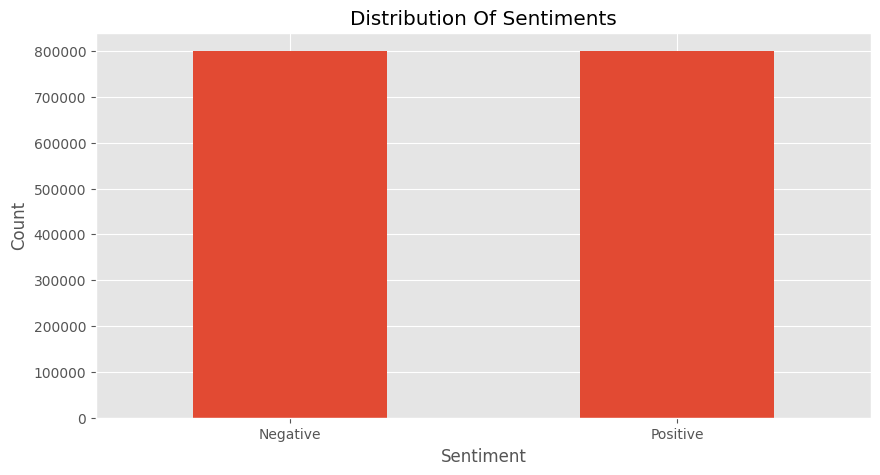

In [67]:
# Plot the distribution of sentiments
ax = df['sentiment'].value_counts().sort_values().plot(
    kind='bar',  # Create a bar plot
    title="Distribution Of Sentiments",  # Set the title of the plot
    figsize=(10, 5)  # Set the figure size
)

# Set x-tick labels for the sentiment categories
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)  # Set labels 
ax.set_xlabel("Sentiment")  # Label for the x-axis
ax.set_ylabel("Count")  # Label for the y-axis

# Display the plot
plt.show()  


In [68]:
# Select only the 'sentiment' and 'text' columns
df = df[['sentiment', 'text']]

# Replace 4 with 1 in the 'sentiment' column
df['sentiment'] = df['sentiment'].replace(4, 1)

In [69]:
# taking a sample from the dataset
df = df.groupby('sentiment').apply(lambda x: x.sample(75000, random_state=42)).reset_index(drop=True)

In [70]:
df['sentiment'].value_counts()

sentiment
0    75000
1    75000
Name: count, dtype: int64

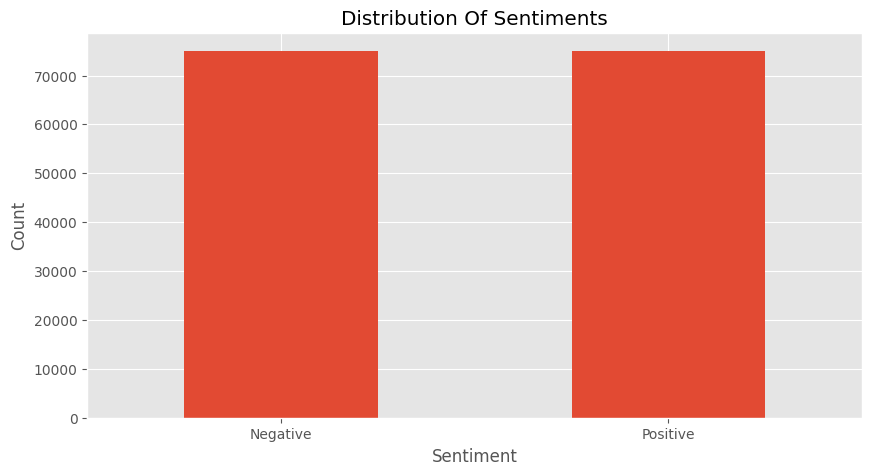

In [71]:
ax=df['sentiment'].value_counts().sort_values().plot(
    kind='bar',
    title="Distribution Of Sentiments",
    figsize=(10,5)
)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
plt.show()

In [72]:
df['text'][340]

'i wish we had more home movies... everyone kind of gave up on them when i was like three '

- # 1-Text Cleaning

In [73]:
def text_cleaning(text):
	soup = BeautifulSoup(text, "html.parser")
	text = re.sub(r'\[[^]]*\]', '', soup.get_text())
	pattern = r"[^a-zA-Z0-9\s,']"
	text = re.sub(pattern, '', text)
	return text
def text_cleaning(text):
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    
    # Remove any text within square brackets and extract plain text
    text = re.sub(r'\[[^]]*\]', '', soup.get_text())
    
    # Define a pattern to remove unwanted characters (non-alphanumeric, excluding spaces, commas, and apostrophes)
    pattern = r"[^a-zA-Z0-9\s,']"
    
    # Substitute unwanted characters with an empty string
    text = re.sub(pattern, '', text)
    
    # Return the cleaned text
    return text


- # 2-Apply text_cleaning

In [74]:
# Apply the text_cleaning function to the 'text' column of the DataFrame
df['text'] = df['text'].apply(text_cleaning)

In [75]:
df['text'][340]

'i wish we had more home movies everyone kind of gave up on them when i was like three '

In [76]:
df.sample(10)

,sentiment,text
54560,0,yesterday i attributed my soreness to the 3hr ...
107744,1,I'm here20 minutes early Fingers crossed for m...
144422,1,this was weekend was really really good
116270,1,mainelife awww shucks blushing thanks
108918,1,aaronob Haha I love that we love the same people
112949,1,"patembe Thanks for you translation, I will add..."
6945,0,VAMBAY i know sorry i called you in the morn b...
91473,1,LadyAnnaC I think you forgot your charger at m...
69843,0,Relaxingjust put drops in my eyesouchie
65763,0,I have been having the scariest dreams ever to...


# **Plot reviews on WordCLouds**

In [77]:
# Function to generate a word cloud
def generate_wordcloud(text, Title):
    # Combine all text into a single string
    all_text = " ".join(text)
    
    # Create a word cloud object with specified dimensions and settings
    wordcloud = WordCloud(width=800, 
                          height=400,
                          stopwords=set(STOPWORDS),  # Exclude common stopwords
                          background_color='black').generate(all_text)  # Generate the word cloud from the text
    
    # Set up the figure for the word cloud display
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud image
    plt.axis("off")  # Hide the axes
    plt.title(Title)  # Set the title of the plot
    plt.show()  # Show the plot


- # 1-Positive Reviews

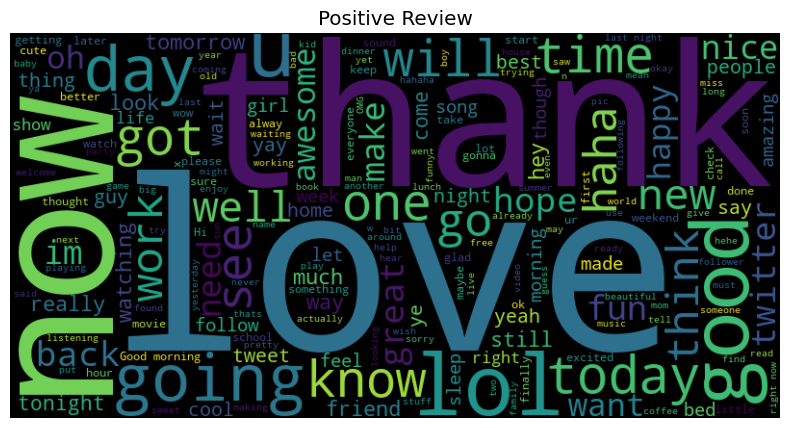

In [78]:
positive = df[df['sentiment']==1]['text'].tolist()
generate_wordcloud(positive,'Positive Review')

- # 2-Negative Reviews

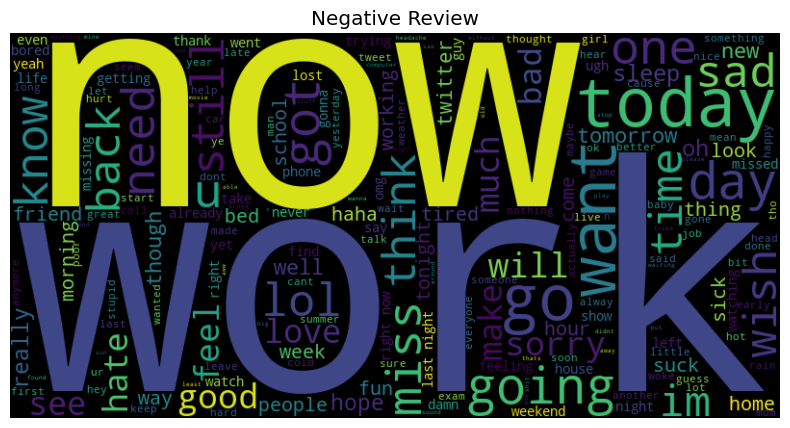

In [79]:
negative = df[df['sentiment']==0]['text'].tolist()
generate_wordcloud(negative,'Negative Review')

# **Separate  text and target sentiment**

In [112]:
x = df['text'] 
y = df['sentiment']  

# Split into training and test sets (30% for validation and final test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Split the test set into validation and final test sets (50% each of this test set)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test)

# **Tokenization**
> BERT tokenization is used to convert the raw text into numerical inputs that can be fed into the BERT model. It tokenized the text and performs some preprocessing to prepare the text for the model's input format.

> Batch Encoding: The batch_encode_plus function is used to tokenize and encode the training, validation, and test sets:

- 1- Padding: Ensures all sequences are the same length.

- 2- Truncation: Cuts off sequences that exceed the maximum length.

- 3- Tensor Conversion: Outputs are returned as TensorFlow tensors for compatibility with TensorFlow models.

- # 1- Load the pre-trained BERT tokenizer

In [113]:
#Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
max_len = 128  # Set the maximum length for tokenization

- # 2- Apply the BERT tokenization in training, testing and validation sets

In [82]:
# Tokenize and encode the sentences using the BERT tokenizer
X_train_encoded = tokenizer.batch_encode_plus(
    x_train.tolist(),  # Convert training texts to a list
    padding=True,  # Pad sequences to the maximum length
    truncation=True,  # Truncate sequences longer than max_length
    max_length=max_len,  # Set the maximum length for sequences
    return_tensors='tf'  # Return TensorFlow tensors
)

X_val_encoded = tokenizer.batch_encode_plus(
    x_val.tolist(), 
    padding=True, 
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

X_test_encoded = tokenizer.batch_encode_plus(
    x_test.tolist(), 
    padding=True, 
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

 - # 3- Check the encoded dataset

In [83]:
# Print an example from the training set
k = 0  # Index for the example to print
print('Training Comments -->>', x_train.iloc[k])  # Print the original comment
print('\nInput Ids -->>\n', X_train_encoded['input_ids'][k])  # Print the input IDs
print('\nDecoded Ids -->>\n', tokenizer.decode(X_train_encoded['input_ids'][k]))  # Decode the input IDs back to text
print('\nAttention Mask -->>\n', X_train_encoded['attention_mask'][k])  # Print the attention mask
print('\nLabels -->>', y_train.iloc[k])  # Print the corresponding label

Training Comments -->> hjn119 He is all cuteness Sorry I couldn't make it  Still waiting for delivery guys Boo

Input Ids -->>
 tf.Tensor(
[  101  1044 22895 14526  2683  2002  2003  2035 10140  2791  3374  1045
  2481  1005  1056  2191  2009  2145  3403  2005  6959  4364 22017   102
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0], shape=(58,), dtype=int32)

Decoded Ids -->>
 [CLS] hjn119 he is all cuteness sorry i couldn't make it still waiting for delivery guys boo [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

Attention Mask -->>
 tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape

# **Build the model**

- # 1-Load the model

In [84]:
#Initialize the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


- # 2-Compile the model

In [114]:
# Compile the model with an optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)  # Adam optimizer with a low learning rate
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Loss function for multi-class classification
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')  # Metric to evaluate accuracy
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])  # Compile the model
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_171 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- # 3-Train the model


In [86]:
# Train the model
history = model.fit(
    [X_train_encoded['input_ids'],  # Input IDs for training
     X_train_encoded['token_type_ids'],  # Token type IDs (set to zeros for single sentence tasks)
     X_train_encoded['attention_mask']],  # Attention mask for training
    y_train,  # Training labels
    validation_data=(
        [X_val_encoded['input_ids'],  # Input IDs for validation
         X_val_encoded['token_type_ids'],  # Token type IDs for validation
         X_val_encoded['attention_mask']],  # Attention mask for validation
        y_val),  # Validation labels
    batch_size=32, 
    epochs=3
)


Epoch 1/3
3282/3282 [==============================] - 1388s 404ms/step - loss: 0.4032 - accuracy: 0.8156 - val_loss: 0.3680 - val_accuracy: 0.8359
Epoch 2/3
3282/3282 [==============================] - 1312s 400ms/step - loss: 0.3050 - accuracy: 0.8691 - val_loss: 0.3745 - val_accuracy: 0.8395
Epoch 3/3
3282/3282 [==============================] - 1313s 400ms/step - loss: 0.2047 - accuracy: 0.9176 - val_loss: 0.4324 - val_accuracy: 0.8332


# **Evaluate the model**

In [88]:
#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], 
     X_test_encoded['token_type_ids'], 
     X_test_encoded['attention_mask']], 
    y_test
)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

704/704 [==============================] - 100s 124ms/step - loss: 0.4261 - accuracy: 0.8359
Test Loss: 0.4261116683483124, Test Accuracy: 0.8358666896820068


# **DistilBERT**

In [91]:
# Initialize the tokenizer and encode the data
D_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
max_len = 128  # Maximum length for tokenization


In [92]:
# Encode training, validation, and test sets
X_train_encoded = D_tokenizer.batch_encode_plus(
    x_train.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

X_val_encoded = D_tokenizer.batch_encode_plus(
    x_val.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

X_test_encoded = D_tokenizer.batch_encode_plus(
    x_test.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

In [93]:
#Initialize the model
D_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [115]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
D_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
D_model.summary()

Model: "tf_distil_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_191 (Dropout)       multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
# Train the model
history = D_model.fit(
    X_train_encoded['input_ids'],  # Input IDs for training
    y_train,  # Training labels
    validation_data=(X_val_encoded['input_ids'], y_val),  # Validation data
    batch_size=32,
    epochs=3 
)

Epoch 1/3
3282/3282 [==============================] - 696s 204ms/step - loss: 0.4227 - accuracy: 0.8017 - val_loss: 0.3798 - val_accuracy: 0.8280
Epoch 2/3
3282/3282 [==============================] - 664s 202ms/step - loss: 0.3300 - accuracy: 0.8561 - val_loss: 0.3839 - val_accuracy: 0.8319
Epoch 3/3
3282/3282 [==============================] - 664s 202ms/step - loss: 0.2413 - accuracy: 0.9003 - val_loss: 0.4032 - val_accuracy: 0.8288


In [97]:
# Evaluate the model on the test set
test_loss, test_accuracy =D_model.evaluate(X_test_encoded['input_ids'], y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


704/704 [==============================] - 50s 63ms/step - loss: 0.4014 - accuracy: 0.8292
Test Loss: 0.4014144241809845, Test Accuracy: 0.829200029373169


In [ ]:
# Define the save path
path = '/kaggle/working'

# Save tokenizer and model
tokenizer.save_pretrained(f'{path}/Tokenizer')
D_model.save_pretrained(f'{path}/Model')


# **RoBERTa**

In [98]:
# Initialize the tokenizer and encode the data
R_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
max_len = 128  # Maximum length for tokenization


In [99]:
# Encode training, validation, and test sets
X_train_encoded =R_tokenizer.batch_encode_plus(
    x_train.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

X_val_encoded = R_tokenizer.batch_encode_plus(
    x_val.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

X_test_encoded =R_tokenizer.batch_encode_plus(
    x_test.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)


In [100]:
# Initialize the model
R_model = TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

#  Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
R_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
R_model.sumarry()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [101]:
#  Train the model
history = R_model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['attention_mask']],  # Input IDs and attention masks for training
    y_train,  # Training labels
    validation_data=(
        [X_val_encoded['input_ids'], X_val_encoded['attention_mask']], y_val),  # Validation data
    batch_size=64, 
    epochs=5 
)

Epoch 1/5
1641/1641 [==============================] - 2004s 1s/step - loss: 0.3682 - accuracy: 0.8380 - val_loss: 0.3121 - val_accuracy: 0.8679
Epoch 2/5
1641/1641 [==============================] - 1929s 1s/step - loss: 0.2949 - accuracy: 0.8767 - val_loss: 0.3233 - val_accuracy: 0.8690
Epoch 3/5
1641/1641 [==============================] - 1930s 1s/step - loss: 0.2572 - accuracy: 0.8944 - val_loss: 0.3279 - val_accuracy: 0.8720
Epoch 4/5
1641/1641 [==============================] - 1929s 1s/step - loss: 0.2200 - accuracy: 0.9122 - val_loss: 0.3247 - val_accuracy: 0.8688
Epoch 5/5
1641/1641 [==============================] - 1930s 1s/step - loss: 0.1850 - accuracy: 0.9268 - val_loss: 0.3735 - val_accuracy: 0.8703


In [102]:
#  Evaluate the model on the test set
test_loss, test_accuracy = R_model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['attention_mask']], y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


704/704 [==============================] - 100s 125ms/step - loss: 0.3661 - accuracy: 0.8709
Test Loss: 0.36609816551208496, Test Accuracy: 0.8709333539009094


# **ALBERT**

In [105]:
#Initialize the tokenizer and encode the data
A_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
max_len = 128  # Maximum length for tokenization

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

In [106]:

# Encode training, validation, and test sets
X_train_encoded = A_tokenizer.batch_encode_plus(
    x_train.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

X_val_encoded = A_tokenizer.batch_encode_plus(
    x_val.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)

X_test_encoded =A_tokenizer.batch_encode_plus(
    x_test.tolist(),
    padding=True,
    truncation=True,
    max_length=max_len,
    return_tensors='tf'
)


In [ ]:
#  Initialize the model
A_model = TFAlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
A_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Train the model
history =  A_model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['attention_mask']],  # Input IDs and attention masks for training
    y_train,  # Training labels
    validation_data=(
        [X_val_encoded['input_ids'], X_val_encoded['attention_mask']], y_val),  # Validation data
    batch_size=128,
    epochs=4  
)

Epoch 1/4
821/821 [==============================] - 1351s 2s/step - loss: 0.4118 - accuracy: 0.8100 - val_loss: 0.3924 - val_accuracy: 0.8278
Epoch 2/4
821/821 [==============================] - 1308s 2s/step - loss: 0.3388 - accuracy: 0.8532 - val_loss: 0.3677 - val_accuracy: 0.8352
Epoch 3/4
821/821 [==============================] - 1309s 2s/step - loss: 0.2874 - accuracy: 0.8786 - val_loss: 0.3789 - val_accuracy: 0.8361
Epoch 4/4
821/821 [==============================] - 1307s 2s/step - loss: 0.2269 - accuracy: 0.9086 - val_loss: 0.4235 - val_accuracy: 0.8288


In [ ]:
#  Evaluate the model 
test_loss, test_accuracy =  A_model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['attention_mask']], y_test)
print(f'Test Loss: {test_loss}, \n Test Accuracy: {test_accuracy}')


704/704 [==============================] - 106s 137ms/step - loss: 0.4147 - accuracy: 0.8336
Test Loss: 0.4147121012210846, 
 Test Accuracy: 0.833644449710846
